## Project 2: House Prices: Mushroom Classification (Edible or Poisonous)
### Link: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

#### Now we will look for any missing value in columns

In [8]:
missing_cols =[cols for cols in df.columns
               if df[cols].isnull().any()]

In [9]:
missing_cols

[]

#### Hence there are No NULL values in the dataset

In [10]:
for i in df.columns:
    print(i,": ",df[i].unique())

class :  ['p' 'e']
cap-shape :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface :  ['s' 'y' 'f' 'g']
cap-color :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises :  ['t' 'f']
odor :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment :  ['f' 'a']
gill-spacing :  ['c' 'w']
gill-size :  ['n' 'b']
gill-color :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape :  ['e' 't']
stalk-root :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring :  ['s' 'f' 'y' 'k']
stalk-color-above-ring :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type :  ['p']
veil-color :  ['w' 'n' 'o' 'y']
ring-number :  ['o' 't' 'n']
ring-type :  ['p' 'e' 'l' 'f' 'n']
spore-print-color :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


## Categorical Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
dataset = df[:]
categorical_dummy = []
for i in df.columns:
    if(len(df[i].unique())<=2):
        df[i]=le.fit_transform(df[i])
    else:
        categorical_dummy.append(i)
cat = df.select_dtypes(include=['object'])
cat.head()

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g


In [12]:
cat_dummies = pd.get_dummies(cat, drop_first=True)
cat_dummies.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# drop categorical variables 
df = df.drop(categorical_dummy, axis=1)


# concat dummy variables with data df
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### In Class:  1 - p (Poisnous) and 0 - e (Edible)

## Making The Model

In [14]:
y = df['class'].values
X = df.iloc[:,1:].values

In [15]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [16]:
X.shape

(8124, 96)

In [17]:
# Splitting the Dataset 
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression as logi
from sklearn.tree import DecisionTreeClassifier as DTR
from sklearn.preprocessing import StandardScaler as sc
from sklearn.ensemble import RandomForestClassifier as RFR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import accuracy_score as AS
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import classification_report as CR

In [19]:
reg = [KNN(),SVC(kernel='linear'),SVC(kernel='rbf'),logi(),DTR(criterion='entropy'),RFR(n_estimators=10,criterion='entropy'),GNB()]
prediction_array = []
acc=[]
confMatrix = []
for i in reg:
    regressor=i
    regressor.fit(X_train,y_train)
    # Applying the K-Fold Cross Validation
    accuracy = cvs(estimator=regressor,X=X_train,y=y_train,cv=10)
    y_pred = regressor.predict(X_test)
    prediction_array.append(y_pred)
    cm=CM(y_test,y_pred)
    confMatrix.append(cm)
    acc.append(accuracy.mean())

C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

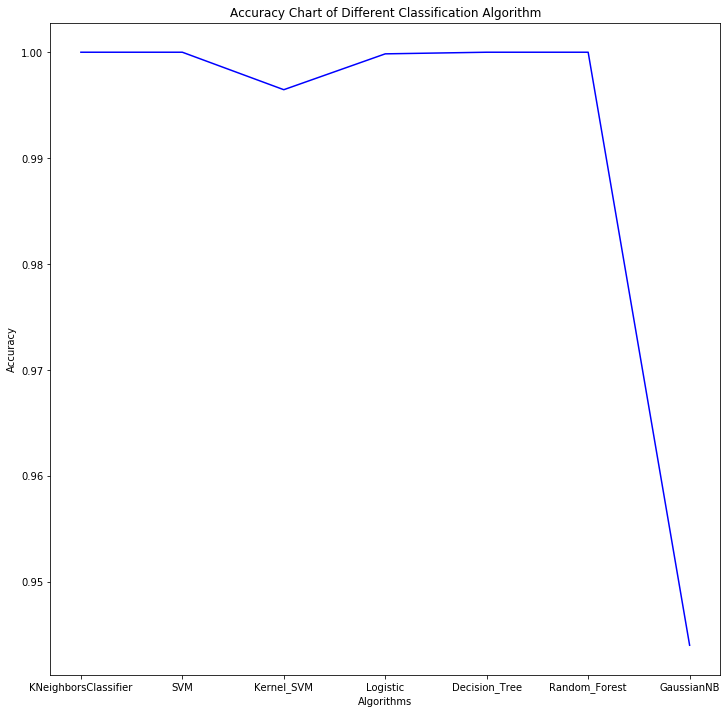

In [20]:
algos = ['KNeighborsClassifier',
'SVM',
'Kernel_SVM',
'Logistic',
'Decision_Tree',
'Random_Forest',
'GaussianNB'
]
# Accuracy Chart
plt.figure(figsize=(12,12))
plt.plot(algos,acc,color='blue')
plt.title('Accuracy Chart of Different Classification Algorithm')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [21]:
for i in range(len(algos)):
    print(algos[i],"\n Accuracy: ",acc[i],"\nConfusion Matrix: ")
    print(confMatrix[i])
    print()
    print("**********")
    print()

KNeighborsClassifier 
 Accuracy:  1.0 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

SVM 
 Accuracy:  1.0 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

Kernel_SVM 
 Accuracy:  0.9964610592614968 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

Logistic 
 Accuracy:  0.9998463901689707 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

Decision_Tree 
 Accuracy:  1.0 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

Random_Forest 
 Accuracy:  1.0 
Confusion Matrix: 
[[852   0]
 [  0 773]]

**********

GaussianNB 
 Accuracy:  0.9439975428253173 
Confusion Matrix: 
[[768  84]
 [  0 773]]

**********



In [22]:
# We will Going With K Nearest Neighbors Classifer
finalModel = KNN()
finalModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
# List of original classification vs predicted classification by the model for first 20 test values

y_pred = finalModel.predict(X_test)
for i in range(20):
    print("Original Value: ",y_test[i]," Predicted Value: ",y_pred[i])

Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0


In [24]:
# Classification Report 
print(CR(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Visualisation

In [25]:
dt = pd.read_csv('mushrooms.csv')

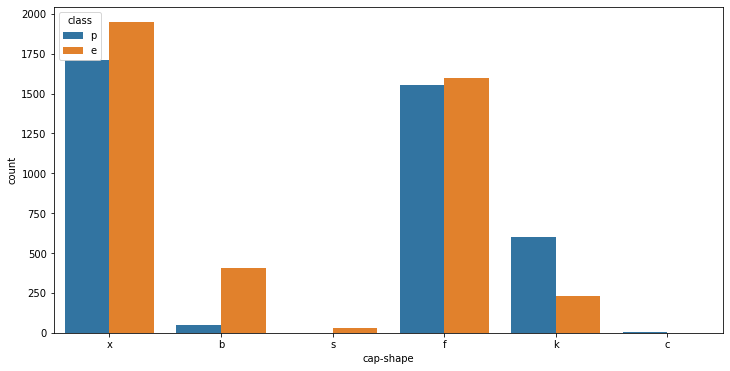

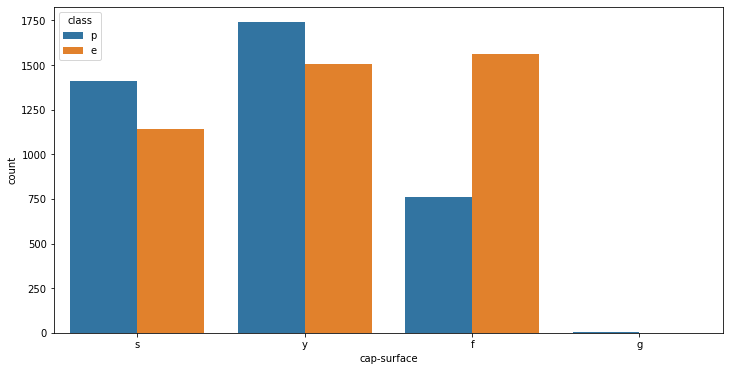

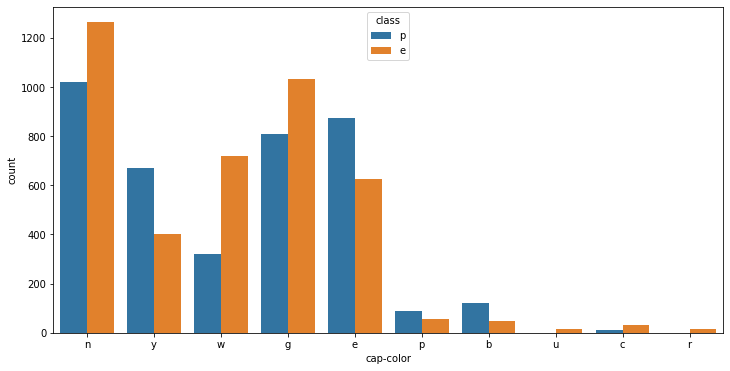

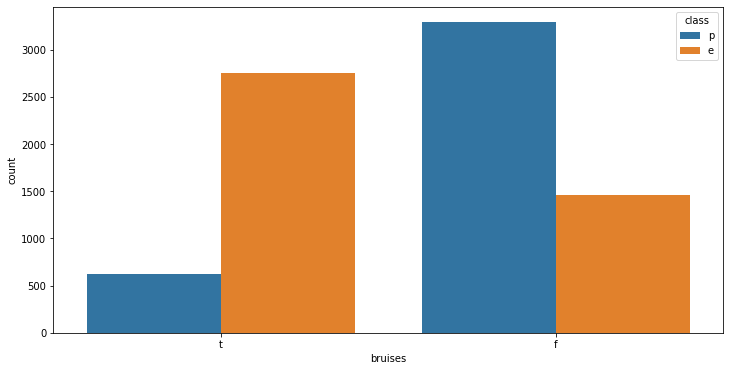

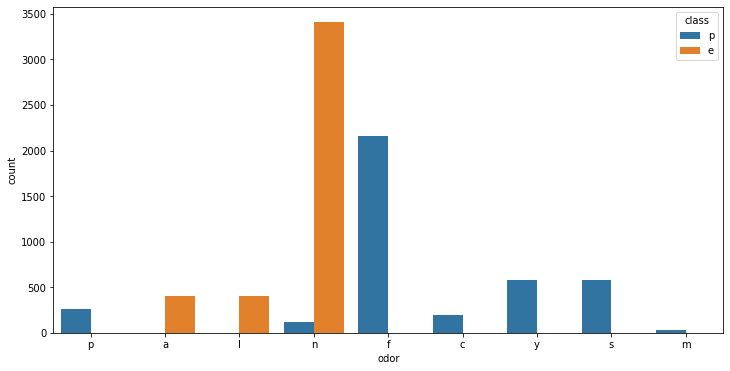

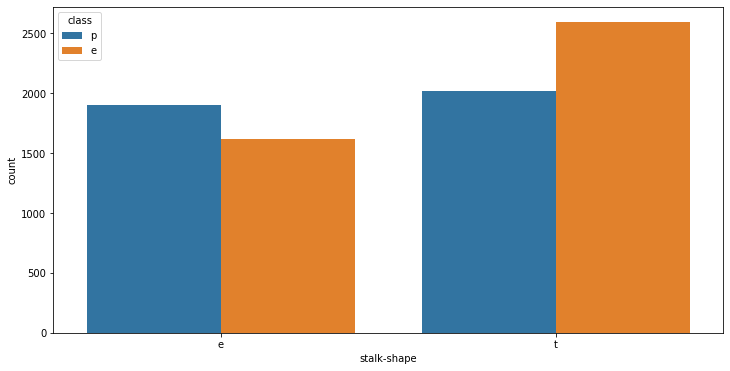

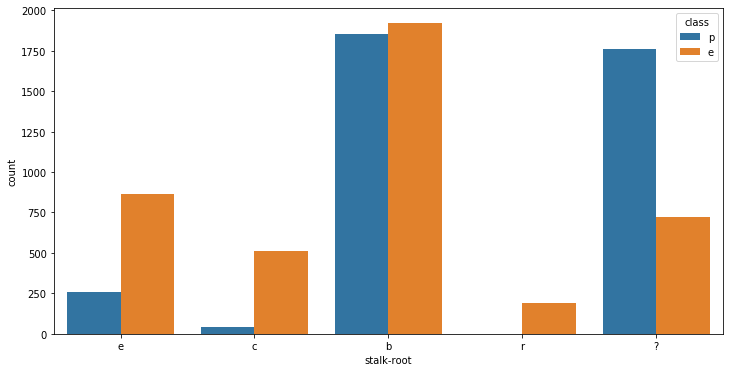

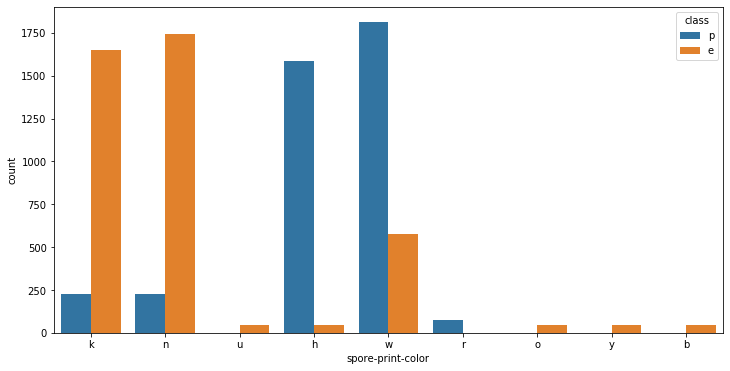

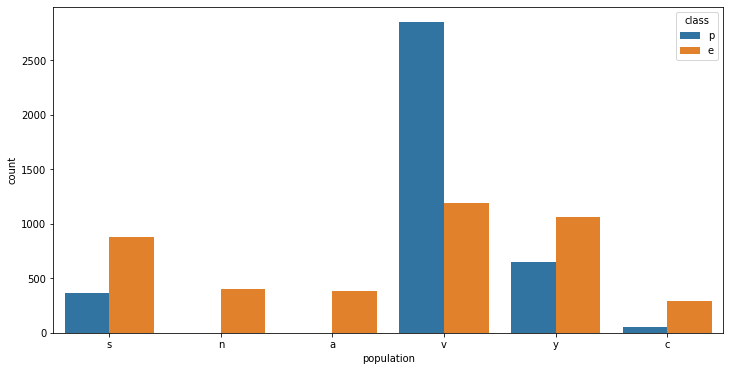

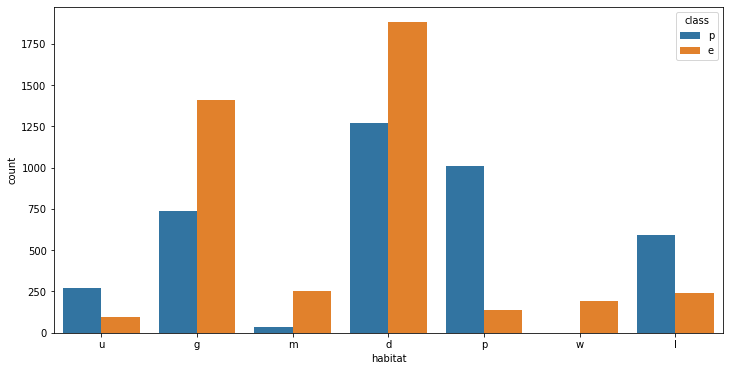

In [34]:
#countplots of some columns
t=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'stalk-shape', 'stalk-root', 'spore-print-color', 'population', 'habitat']
for i in t:
    plt.figure(figsize=(12,6))
    sns.countplot(x=i,data=dt,hue='class')

#### Name: Sahil Harjai